This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades.


# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)


In [14]:
import pandas as pd

math_data_path = r"C:\Users\KIIT\Desktop\Files\Celebal Tech\Student Performance\student\student-mat.csv"
portuguese_data_path = r"C:\Users\KIIT\Desktop\Files\Celebal Tech\Student Performance\student\student-por.csv"

math_data = pd.read_csv(math_data_path, sep=';')
portuguese_data = pd.read_csv(portuguese_data_path, sep=';')

print("Math Data Overview:")
print(math_data.head())

print("\nMath Data Info:")
print(math_data.info())

print("\nPortuguess Data Info:")
print(portuguese_data.head())

print("\nPortuguse Data Info:")
print(portuguese_data.info())

Math Data Overview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Math Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [22]:
# Define the columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

In [24]:
# Preprocessing pipeline for numerical data
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [26]:
# Preprocessing pipeline for categorical data
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

In [30]:
# Apply the transformations to both datasets
math_data_preprocessed = preprocessor.fit_transform(math_data)
portuguese_data_preprocessed = preprocessor.fit_transform(portuguese_data)


In [34]:
# Get the feature names
num_features = numerical_columns
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)
all_features = list(num_features) + list(cat_features)


In [36]:

# Convert the transformed data back to DataFrame
math_data_preprocessed_df = pd.DataFrame(math_data_preprocessed, columns=all_features)
portuguese_data_preprocessed_df = pd.DataFrame(portuguese_data_preprocessed, columns=all_features)


In [38]:
# Print the first few rows of the transformed data
print("Preprocessed Math Data:")
print(math_data_preprocessed_df.head())
print("\nPreprocessed Portuguese Data:")
print(portuguese_data_preprocessed_df.head())

Preprocessed Math Data:
        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.023046  1.143856  1.360371    0.792251  -0.042286 -0.449944  0.062194   
1  0.238380 -1.600009 -1.399970   -0.643249  -0.042286 -0.449944  1.178860   
2 -1.330954 -1.600009 -1.399970   -0.643249  -0.042286  3.589323  0.062194   
3 -1.330954  1.143856 -0.479857   -0.643249   1.150779 -0.449944 -1.054472   
4 -0.546287  0.229234  0.440257   -0.643249  -0.042286 -0.449944  0.062194   

   freetime     goout      Dalc  ...  activities_no  activities_yes  \
0 -0.236010  0.801479 -0.540699  ...            1.0             0.0   
1 -0.236010 -0.097908 -0.540699  ...            1.0             0.0   
2 -0.236010 -0.997295  0.583385  ...            1.0             0.0   
3 -1.238419 -0.997295 -0.540699  ...            0.0             1.0   
4 -0.236010 -0.997295 -0.540699  ...            1.0             0.0   

   nursery_no  nursery_yes  higher_no  higher_yes  internet_no  internet_yes  \


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Add G3 back to the preprocessed data for correlation analysis
math_data_preprocessed_df['G3'] = math_data['G3'].values
portuguese_data_preprocessed_df['G3'] = portuguese_data['G3'].values

# Verify the addition
print(math_data_preprocessed_df.head())
print(portuguese_data_preprocessed_df.head())


        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.023046  1.143856  1.360371    0.792251  -0.042286 -0.449944  0.062194   
1  0.238380 -1.600009 -1.399970   -0.643249  -0.042286 -0.449944  1.178860   
2 -1.330954 -1.600009 -1.399970   -0.643249  -0.042286  3.589323  0.062194   
3 -1.330954  1.143856 -0.479857   -0.643249   1.150779 -0.449944 -1.054472   
4 -0.546287  0.229234  0.440257   -0.643249  -0.042286 -0.449944  0.062194   

   freetime     goout      Dalc  ...  activities_yes  nursery_no  nursery_yes  \
0 -0.236010  0.801479 -0.540699  ...             0.0         0.0          1.0   
1 -0.236010 -0.097908 -0.540699  ...             0.0         1.0          0.0   
2 -0.236010 -0.997295  0.583385  ...             0.0         0.0          1.0   
3 -1.238419 -0.997295 -0.540699  ...             1.0         0.0          1.0   
4 -0.236010 -0.997295 -0.540699  ...             0.0         0.0          1.0   

   higher_no  higher_yes  internet_no  inter

C:\Users\KIIT\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


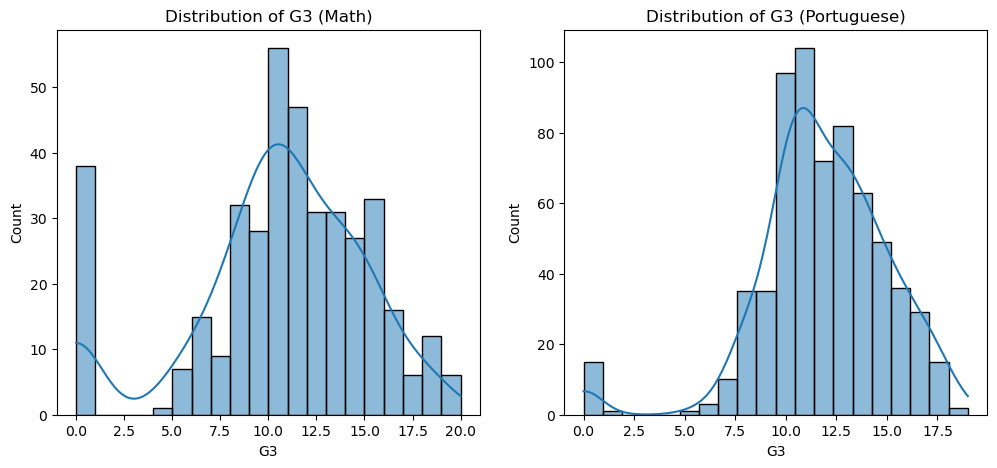

In [46]:

# Plot the distribution of the target variable G3 for both datasets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(math_data_preprocessed_df['G3'], bins=20, kde=True)
plt.title('Distribution of G3 (Math)')

plt.subplot(1, 2, 2)
sns.histplot(portuguese_data_preprocessed_df['G3'], bins=20, kde=True)
plt.title('Distribution of G3 (Portuguese)')

plt.show()


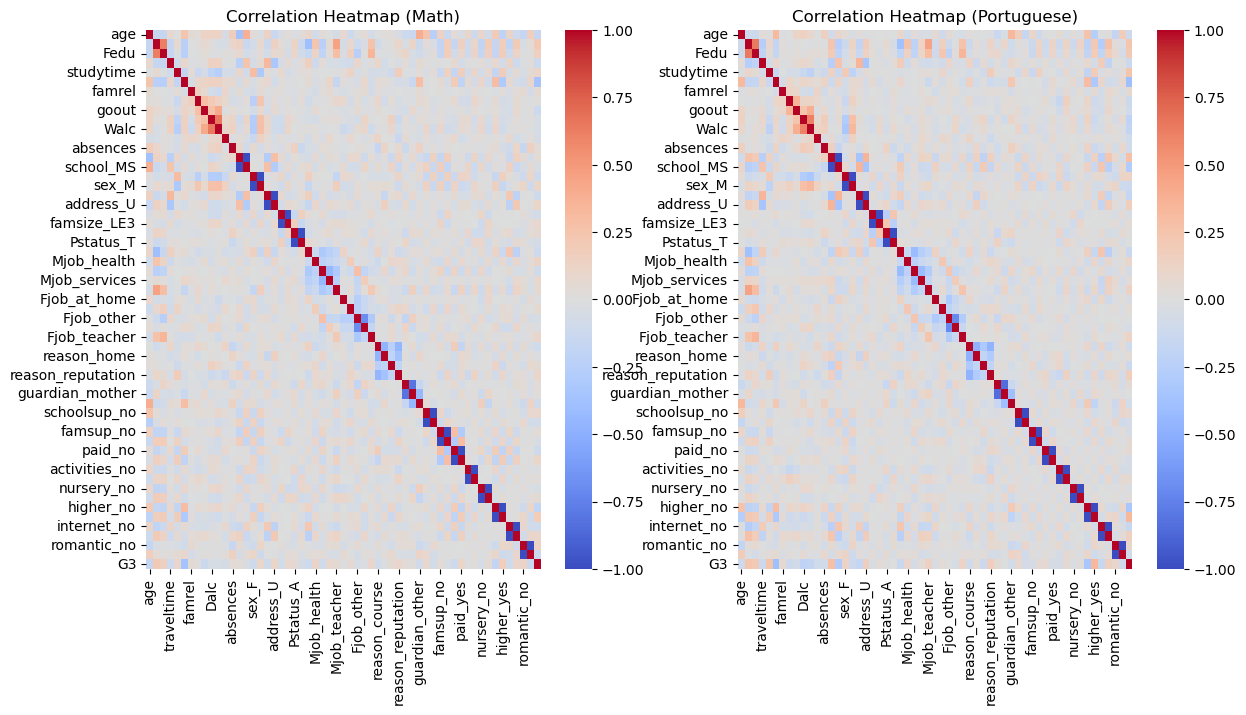

In [48]:
# Compute the correlation matrix
math_corr = math_data_preprocessed_df.corr()
portuguese_corr = portuguese_data_preprocessed_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(math_corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Math)')

plt.subplot(1, 2, 2)
sns.heatmap(portuguese_corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Portuguese)')

plt.show()


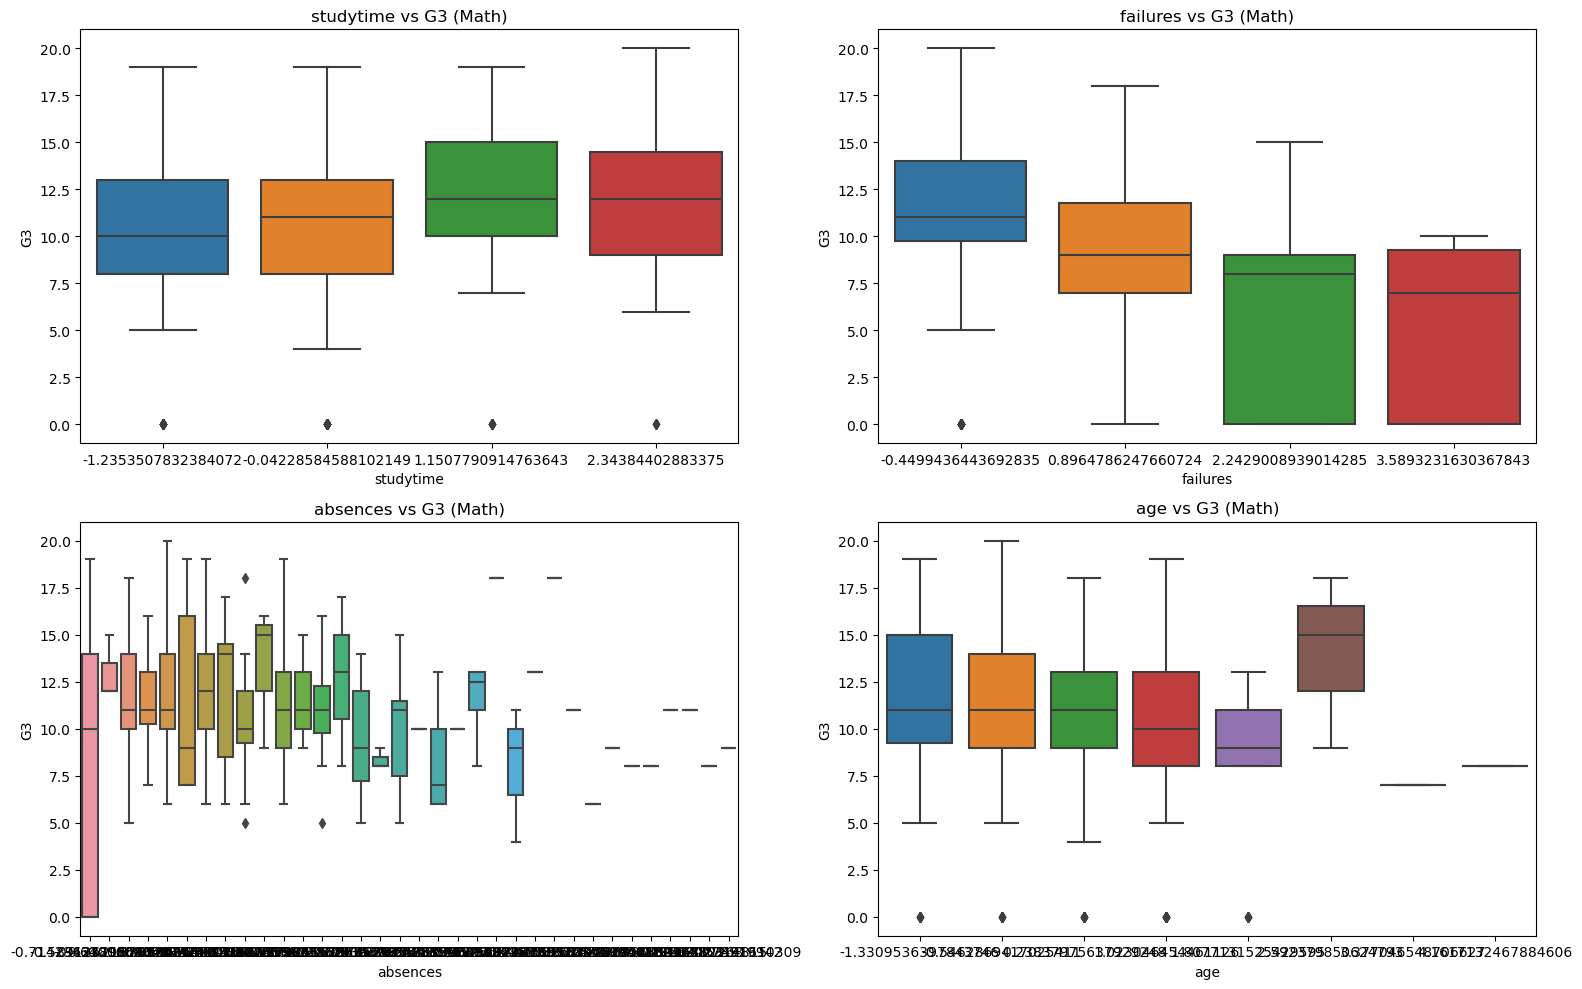

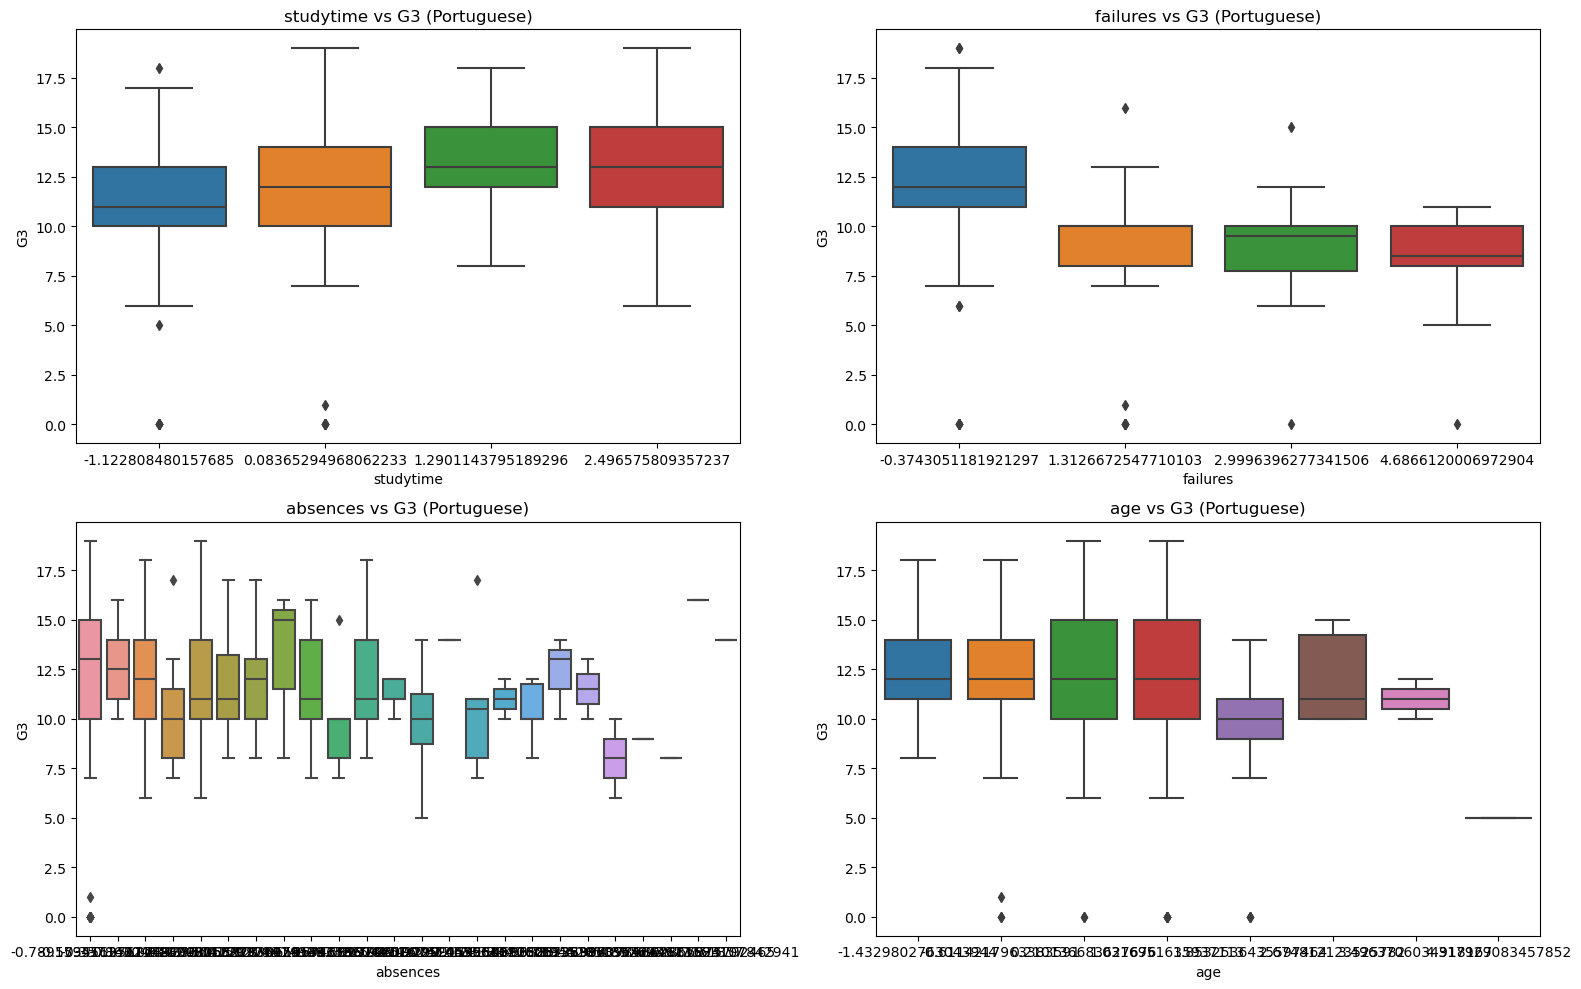

In [52]:
# Select some important features to visualize their relationship with G3
important_features = ['studytime', 'failures', 'absences', 'age']

plt.figure(figsize=(16, 10))

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=math_data_preprocessed_df[feature], y=math_data_preprocessed_df['G3'])
    plt.title(f'{feature} vs G3 (Math)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=portuguese_data_preprocessed_df[feature], y=portuguese_data_preprocessed_df['G3'])
    plt.title(f'{feature} vs G3 (Portuguese)')

plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_math = math_data_preprocessed_df.drop('G3', axis=1)
y_math = math_data_preprocessed_df['G3']

X_portuguese = portuguese_data_preprocessed_df.drop('G3', axis=1)
y_portuguese = portuguese_data_preprocessed_df['G3']

X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(X_math, y_math, test_size=0.2, random_state=42)
X_portuguese_train, X_portuguese_test, y_portuguese_train, y_portuguese_test = train_test_split(X_portuguese, y_portuguese, test_size=0.2, random_state=42)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train linear regression model for Math
lr_math = LinearRegression()
lr_math.fit(X_math_train, y_math_train)

# Predictions for Math
y_math_pred = lr_math.predict(X_math_test)

# Train linear regression model for Portuguese
lr_portuguese = LinearRegression()
lr_portuguese.fit(X_portuguese_train, y_portuguese_train)

# Predictions for Portuguese
y_portuguese_pred = lr_portuguese.predict(X_portuguese_test)

# Evaluate the models
mse_math = mean_squared_error(y_math_test, y_math_pred)
r2_math = r2_score(y_math_test, y_math_pred)

mse_portuguese = mean_squared_error(y_portuguese_test, y_portuguese_pred)
r2_portuguese = r2_score(y_portuguese_test, y_portuguese_pred)

print(f'Math - Mean Squared Error: {mse_math}, R2 Score: {r2_math}')
print(f'Portuguese - Mean Squared Error: {mse_portuguese}, R2 Score: {r2_portuguese}')


Math - Mean Squared Error: 17.572685145124606, R2 Score: 0.14300684531989305
Portuguese - Mean Squared Error: 8.225142728365384, R2 Score: 0.15654406380078756


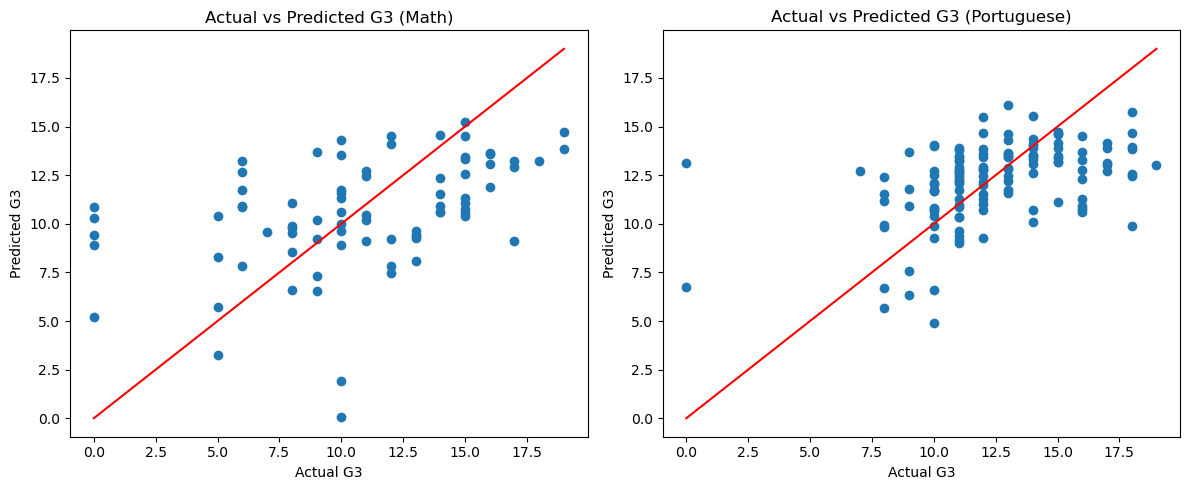

In [58]:
# Visualize predictions for Math
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_math_test, y_math_pred)
plt.plot([min(y_math_test), max(y_math_test)], [min(y_math_test), max(y_math_test)], color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted G3 (Math)')

# Visualize predictions for Portuguese
plt.subplot(1, 2, 2)
plt.scatter(y_portuguese_test, y_portuguese_pred)
plt.plot([min(y_portuguese_test), max(y_portuguese_test)], [min(y_portuguese_test), max(y_portuguese_test)], color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted G3 (Portuguese)')

plt.tight_layout()
plt.show()


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model for Math
rf_math = RandomForestRegressor(n_estimators=100, random_state=42)
rf_math.fit(X_math_train, y_math_train)

# Predictions for Math
y_math_pred_rf = rf_math.predict(X_math_test)

# Train Random Forest model for Portuguese
rf_portuguese = RandomForestRegressor(n_estimators=100, random_state=42)
rf_portuguese.fit(X_portuguese_train, y_portuguese_train)

# Predictions for Portuguese
y_portuguese_pred_rf = rf_portuguese.predict(X_portuguese_test)

# Evaluate the models
mse_math_rf = mean_squared_error(y_math_test, y_math_pred_rf)
r2_math_rf = r2_score(y_math_test, y_math_pred_rf)

mse_portuguese_rf = mean_squared_error(y_portuguese_test, y_portuguese_pred_rf)
r2_portuguese_rf = r2_score(y_portuguese_test, y_portuguese_pred_rf)

print(f'Math (Random Forest) - Mean Squared Error: {mse_math_rf}, R2 Score: {r2_math_rf}')
print(f'Portuguese (Random Forest) - Mean Squared Error: {mse_portuguese_rf}, R2 Score: {r2_portuguese_rf}')


Math (Random Forest) - Mean Squared Error: 14.150987341772153, R2 Score: 0.3098778482793111
Portuguese (Random Forest) - Mean Squared Error: 7.917514615384614, R2 Score: 0.188090113104051


In [64]:
from sklearn.model_selection import GridSearchCV

# Define the corrected parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for Math with corrected parameters
grid_search_math = GridSearchCV(estimator=rf_math, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_math.fit(X_math_train, y_math_train)

# Best parameters for Math
best_params_math = grid_search_math.best_params_
print(f'Best parameters for Math: {best_params_math}')

# Perform Grid Search for Portuguese with corrected parameters
grid_search_portuguese = GridSearchCV(estimator=rf_portuguese, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_portuguese.fit(X_portuguese_train, y_portuguese_train)

# Best parameters for Portuguese
best_params_portuguese = grid_search_portuguese.best_params_
print(f'Best parameters for Portuguese: {best_params_portuguese}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Math: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Portuguese: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest with best parameters for Math
rf_math_tuned = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                                      min_samples_split=10, n_estimators=200, random_state=42)
rf_math_tuned.fit(X_math_train, y_math_train)

# Make predictions for Math
y_math_pred_rf_tuned = rf_math_tuned.predict(X_math_test)

# Evaluate the tuned model for Math
mse_math_rf_tuned = mean_squared_error(y_math_test, y_math_pred_rf_tuned)
r2_math_rf_tuned = r2_score(y_math_test, y_math_pred_rf_tuned)

print(f'Math (Tuned Random Forest) - Mean Squared Error: {mse_math_rf_tuned}, R2 Score: {r2_math_rf_tuned}')

# Train Random Forest with best parameters for Portuguese
rf_portuguese_tuned = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=1, 
                                            min_samples_split=2, n_estimators=200, random_state=42)
rf_portuguese_tuned.fit(X_portuguese_train, y_portuguese_train)

# Make predictions for Portuguese
y_portuguese_pred_rf_tuned = rf_portuguese_tuned.predict(X_portuguese_test)

# Evaluate the tuned model for Portuguese
mse_portuguese_rf_tuned = mean_squared_error(y_portuguese_test, y_portuguese_pred_rf_tuned)
r2_portuguese_rf_tuned = r2_score(y_portuguese_test, y_portuguese_pred_rf_tuned)

print(f'Portuguese (Tuned Random Forest) - Mean Squared Error: {mse_portuguese_rf_tuned}, R2 Score: {r2_portuguese_rf_tuned}')


Math (Tuned Random Forest) - Mean Squared Error: 16.39782357930003, R2 Score: 0.20030305880652421
Portuguese (Tuned Random Forest) - Mean Squared Error: 7.66426437211862, R2 Score: 0.21405992640467053


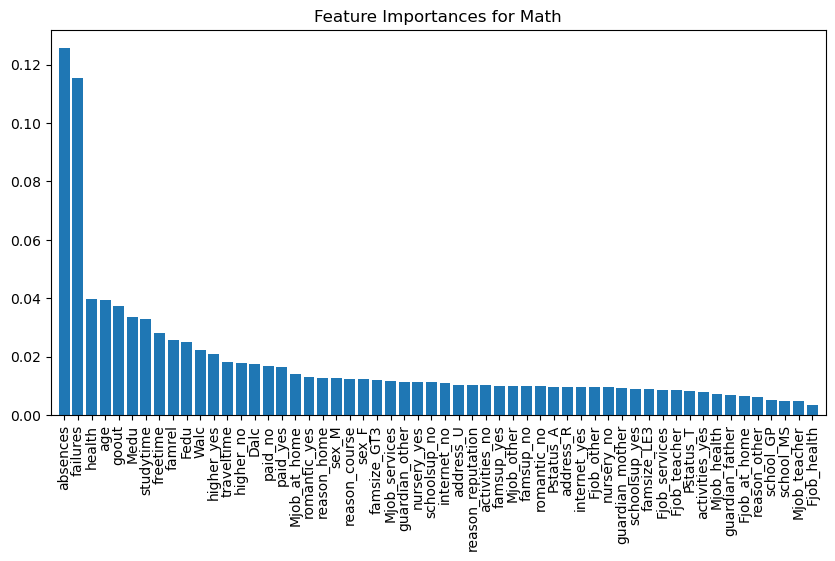

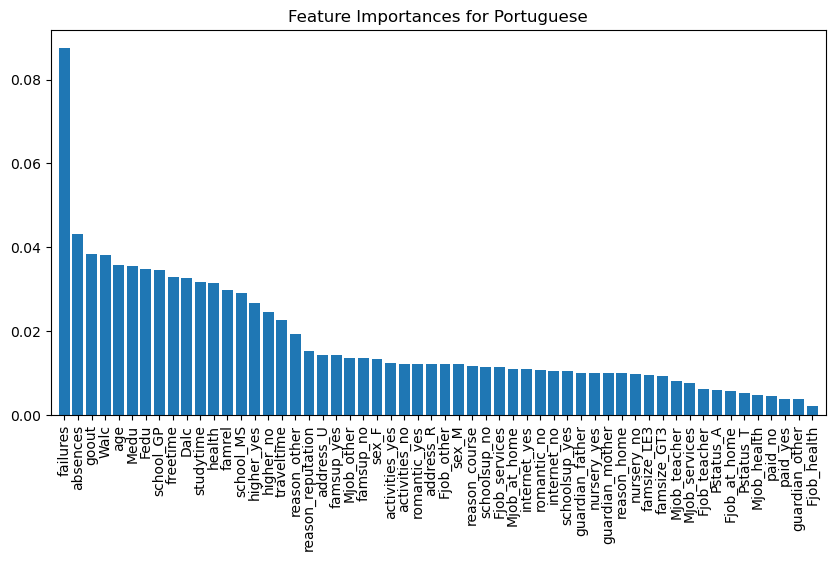

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for Math
importances_math = rf_math_tuned.feature_importances_
indices_math = np.argsort(importances_math)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances for Math")
plt.bar(range(X_math_train.shape[1]), importances_math[indices_math], align="center")
plt.xticks(range(X_math_train.shape[1]), X_math_train.columns[indices_math], rotation=90)
plt.xlim([-1, X_math_train.shape[1]])
plt.show()

# Feature importance for Portuguese
importances_portuguese = rf_portuguese_tuned.feature_importances_
indices_portuguese = np.argsort(importances_portuguese)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances for Portuguese")
plt.bar(range(X_portuguese_train.shape[1]), importances_portuguese[indices_portuguese], align="center")
plt.xticks(range(X_portuguese_train.shape[1]), X_portuguese_train.columns[indices_portuguese], rotation=90)
plt.xlim([-1, X_portuguese_train.shape[1]])
plt.show()
